                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.

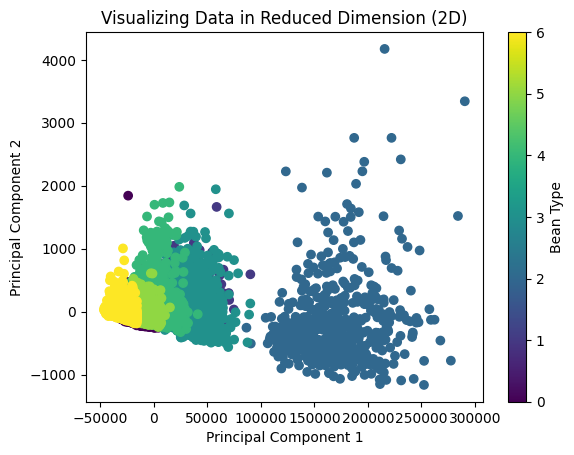

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('D:\\Python\\MachineLearning\\MachineLearning\\week07\\data\\Dry_Bean_Dataset.csv')

# Tách dữ liệu và nhãn
X = data.iloc[:, :-1]  # Dữ liệu đặc trưng
y = data.iloc[:, -1]   # nhãn
X = np.array(X)
y = np.array(y)
print(data.describe())
# Sử dụng PCA để giảm chiều dữ liệu xuống 2 hoặc 3 chiều
pca = PCA(n_components=2)  # Đối với 2 chiều
# pca = PCA(n_components=3)  # Đối với 3 chiều
X_reduced = pca.fit_transform(X)

# Trực quan hóa dữ liệu giảm chiều
y_numeric = pd.factorize(y)[0]
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric, cmap='viridis')
plt.title('Visualizing Data in Reduced Dimension (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Bean Type')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Chia dữ liệu thành tập train và validation với tỉ lệ 7:3
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo và huấn luyện mô hình Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred = nb_model.predict(X_val)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.7627326150832517
Precision: 0.7618328637736613
Recall: 0.7627326150832517


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tạo và huấn luyện mô hình Multinomial Logistic Regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

# Dự đoán nhãn cho các mẫu trong tập test
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9142997061704211
Precision: 0.9151383004557252
Recall: 0.9142997061704211


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Chia dữ liệu thành tập train và validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

# Xây dựng mô hình ANN với 1 tầng ẩn có 32 nơ-ron
model = MLPClassifier(hidden_layer_sizes=(32,), max_iter=1000)

# Huấn luyện mô hình trên tập train
model.fit(X_train, y_train)

# Dự đoán nhãn trên tập validation
y_pred = model.predict(X_validation)

# Đánh giá độ chính xác của mô hình
precision = precision_score(y_validation, y_pred, average='weighted')
recall = recall_score(y_validation, y_pred, average='weighted')
accuracy = accuracy_score(y_validation, y_pred)

# In kết quả
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


Precision: 0.5106187419184742
Recall: 0.48726738491674826
Accuracy: 0.48726738491674826


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Giảm chiều dữ liệu xuống còn 4 chiều và đánh giá với 3 mô hình trên

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('D:\\Python\\MachineLearning\\MachineLearning\\week07\\data\\Dry_Bean_Dataset.csv')

# Tách dữ liệu và nhãn
X = data.drop("Class", axis=1)
y = data["Class"]  # nhãn
# Mã hóa labels sang thành số
label_mapping = {
    "SEKER": 0,
    "BARBUNYA": 1,
    "BOMBAY": 2,
    "CALI": 3,
    "HOROZ": 4,
    "SIRA": 5,
    "DERMASON": 6,
}
numeric_labels = y.map(label_mapping)

# Sử dụng PCA để giảm chiều dữ liệu xuống 2 hoặc 3 chiều
pca = PCA(n_components=4)  # Đối với 2 chiều
# pca = PCA(n_components=3)  # Đối với 3 chiều
X_reduced = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Chia dữ liệu thành tập train và validation với tỉ lệ 7:3
X_train, X_val, y_train, y_val = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Khởi tạo và huấn luyện mô hình Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred = nb_model.predict(X_val)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')

print("Naive Bayses: ")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Tạo và huấn luyện mô hình Multinomial Logistic Regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

# Dự đoán nhãn cho các mẫu trong tập test
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Mulinomial Logistic Regresstion: ")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Chia dữ liệu thành tập train và validation
X_train, X_validation, y_train, y_validation = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Xây dựng mô hình ANN với 1 tầng ẩn có 32 nơ-ron
model = MLPClassifier(hidden_layer_sizes=(32,), max_iter=1000)

# Huấn luyện mô hình trên tập train
model.fit(X_train, y_train)

# Dự đoán nhãn trên tập validation
y_pred = model.predict(X_validation)

# Đánh giá độ chính xác của mô hình
precision = precision_score(y_validation, y_pred, average='weighted')
recall = recall_score(y_validation, y_pred, average='weighted')
accuracy = accuracy_score(y_validation, y_pred)

# In kết quả
print("Multinomial Layer Perceptron:")
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


Naive Bayses: 
Accuracy: 0.8964250734573947
Precision: 0.8986386238571112
Recall: 0.8964250734573947


c:\Users\FPT SHOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mulinomial Logistic Regresstion: 
Accuracy: 0.8947110675808031
Precision: 0.8942399316357296
Recall: 0.8947110675808031
Multinomial Layer Perceptron:
Precision: 0.8254523849977979
Recall: 0.7698334965719883
Accuracy: 0.7698334965719883


Giảm số chiều xuống khiến cho mô hình Gauss NB tăng độ chính xác 1 chút, Mutinomial Logistic vẫn giữ nguyên độ chính xác . CUối cùng ANN cải thiện độ chính xác cũng như các chỉ số khác nhiều nhất. Nó cho thấy rằng phương pháp ANN phụ thuộc nhiều vào việc giảm số chiều.